In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan

from src.clusterings_space import *
from src.multiparameter_clustering import *
from src.plotting import *

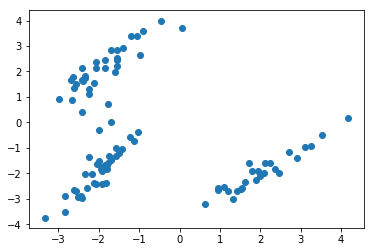

In [15]:
# import dataset and display it

data = pd.read_csv("./example-datasets/simple-dataset.csv", header=None)
test_data = np.asarray(data[[0,1]])

plt.scatter(test_data.T[0], test_data.T[1])
plt.show()

In [16]:
# run HDBSCAN with a range of parameters on the dataset
# this is the set S

range_min_cluster_sizes = [ m for m in range(2,20)]
range_min_samples = [ k for k in range(1,20) ]

range_min_cluster_sizes_min_samples = [(m,k) for m in range_min_cluster_sizes for k in range_min_samples]

clusterings = multiparameter_hdbscan_(test_data, range_min_cluster_sizes_min_samples)

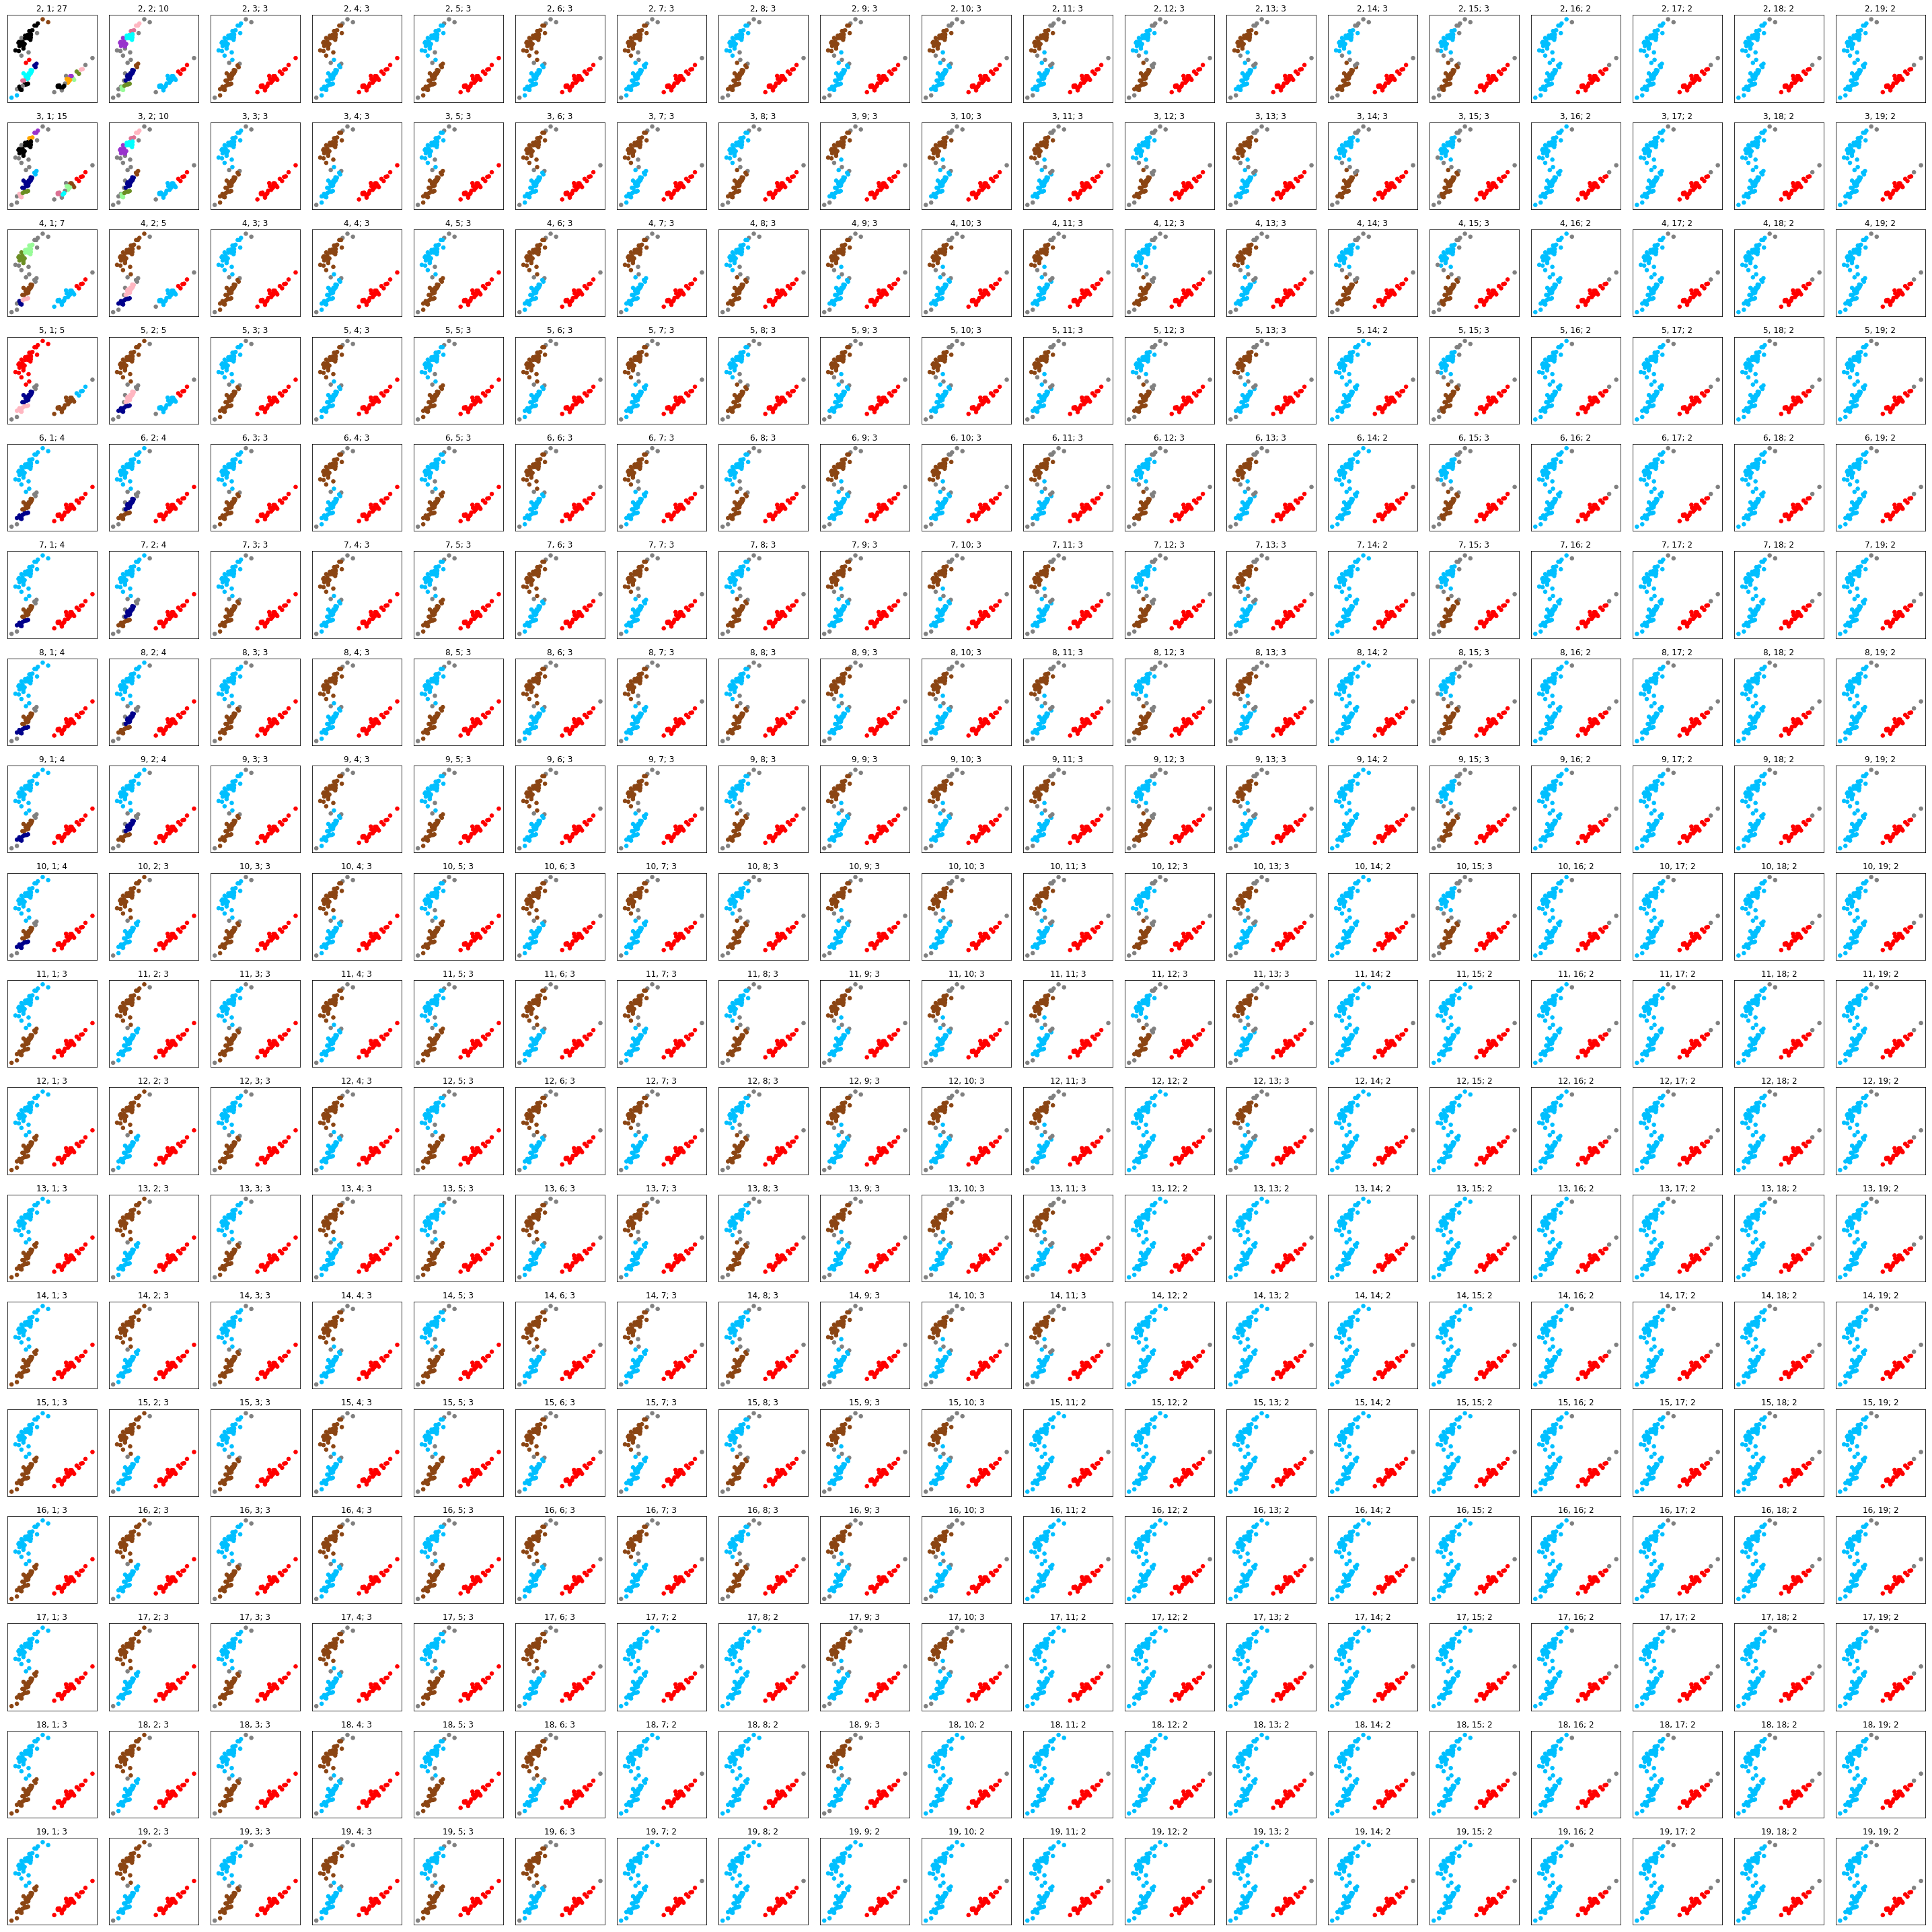

In [17]:
# display all the clusterings in a grid (this can be skipped, and it takes a while)

plot_clusterings_grid(test_data, clusterings, figsize=(40,40))

In [18]:
# construct M(S), by sampling 500 columns

cls_df = clusterings_as_df(clusterings, seed = 0, n_dim = 1000)

In [19]:
# using PREF, the dimension d is n_dim

clustering_cl_space_pref, keys, counts = pref(cls_df, n_dim = 5)

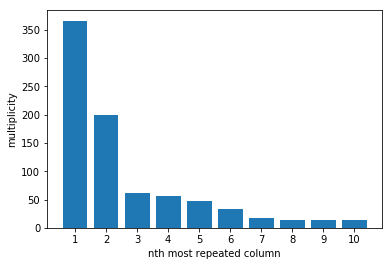

In [20]:
# check the multiplicities of the most repeated columns (d = 4 looks OK)

plot_sizes(counts,range(0,10))

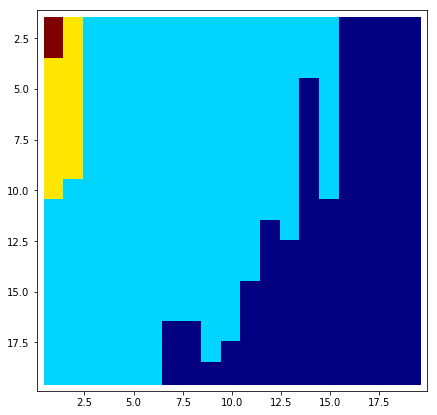

In [21]:
# plot the parameter space partitioned according to PREF
# (we reverse the Y coordinate, so it matches the grid of clusterings)

plot_cl_space_grouping(keys, clustering_cl_space_pref, rev=True, figsize=(7,7), dotsize=500)

pca with 2 components
explained variance ratio:  [0.71907695 0.09678836]
singular values:  [146.17554397  53.62886356]


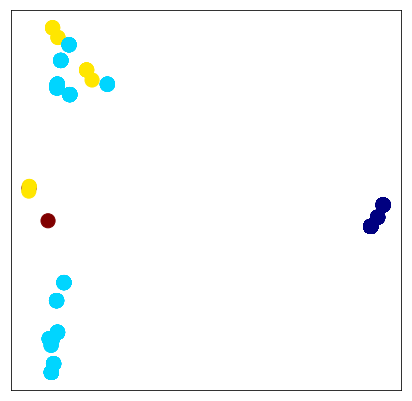

In [22]:
# plot PCA projection according to PREF's partition.
#In this case the yellow class is not easy to separate from the light blue class.

pca_reduction2 = pca_reduction(cls_df, 2)

plot_cl_space_2d(pca_reduction2, clustering_clspace = clustering_cl_space_pref, dotsize=200, figsize=(7,7), alpha=1)

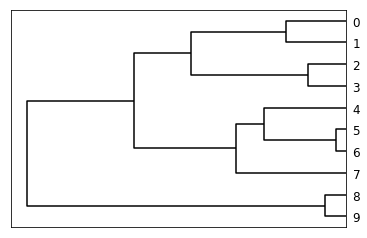

In [23]:
# Now using HPREF. Start by choosing large max_l and visualizing the dendrogram

clustering_cl_space_hpref, keys, dendr = hpref(cls_df, max_l = 10)

plot_dendrogram(dendr)

In [24]:
# Looking at the dendrogram, max_l = 4 seems reasonable

clustering_cl_space_hpref, keys, dendr = hpref(cls_df, max_l = 4)

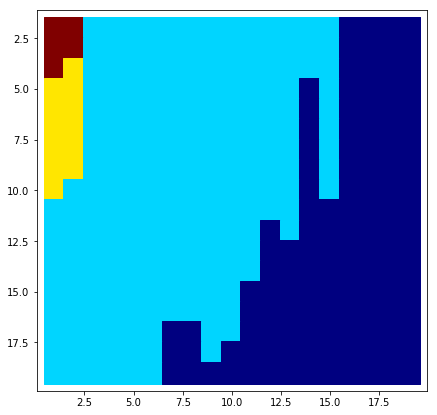

In [25]:
# Visualize the parameter space

plot_cl_space_grouping(keys, clustering_cl_space_hpref, rev=True, figsize=(7,7), dotsize=500)